# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Shiba Inu, and Litecoin Daily Price Analyses – 29 June Roundup.  The performance of the global crypto market has seen no improvement despite the previous bullish wave. It is back to bearishness as the gains for Bitcoin, Ethereum, and others have eroded, affecting the overall market. The negative changes continue to plague the market as the losses increase. The changing situation might affect the investors if... ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-shiba-inu-and-litecoin-daily-price-analyses-29-june-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- COVID-19 boosters recommended for the fall, Canada's vaccine advisory body says | CBC News.  People at high risk of severe disease from COVID-19 infection should be offered a booster shot this fall, regardless of how many boosters they've previously received, the National Advisory Committee on Immunization said on Wednesday. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/covid-19-vaccines-boosters-fall-2022-naci-1.6506360) 

### Kainų kaita pandemijos metu

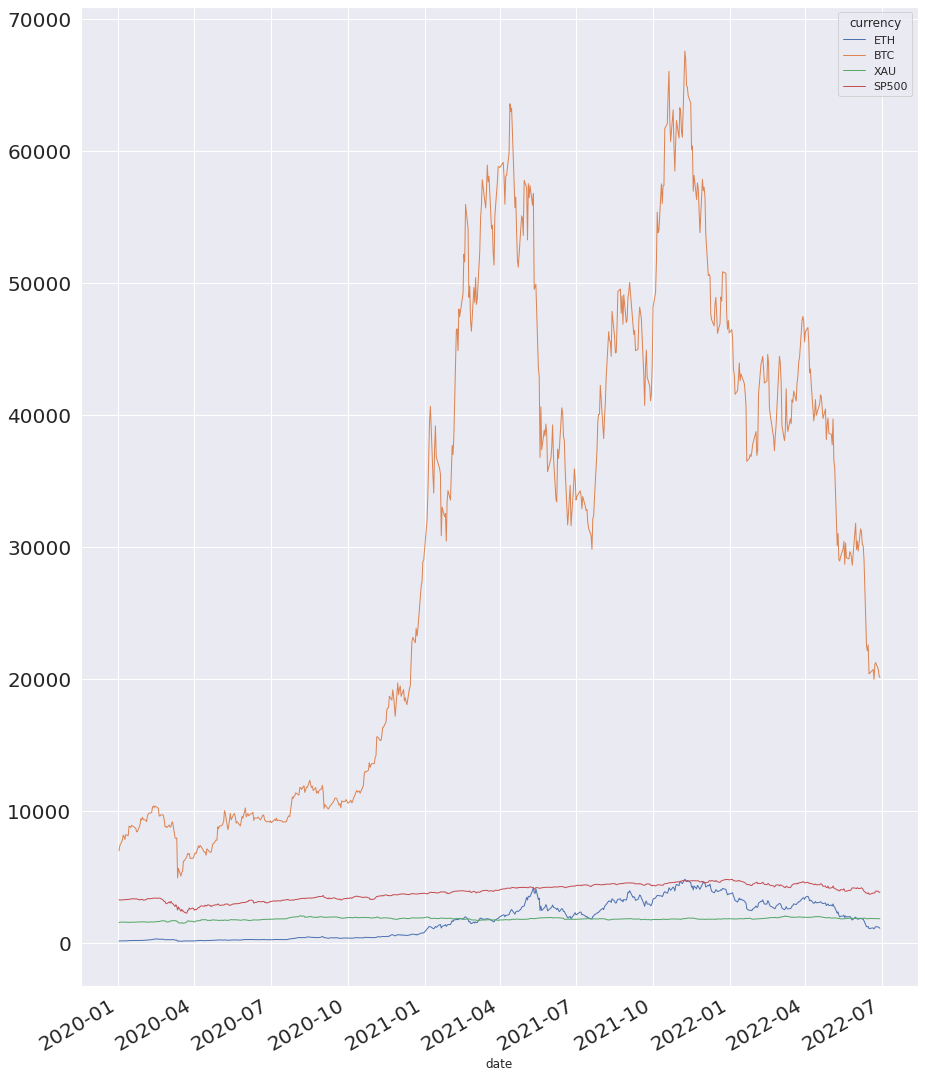

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903187,0.245517,0.922147
BTC,0.903187,1.000000,0.192692,0.869198
XAU,0.245517,0.192692,1.000000,0.378083
SP500,0.922147,0.869198,0.378083,1.000000


In [8]:
#hide ### Koreliacijos matrica.

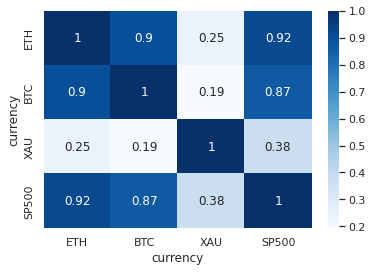

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')